In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
df = pd.read_excel("premiums.xlsx")
print("df shape:",df.shape)
df.head()

df shpae: (50000, 13)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


Some rows have spacing before the value 

### Data types of features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    50000 non-null  int64 
 1   Gender                 50000 non-null  object
 2   Region                 50000 non-null  object
 3   Marital_status         50000 non-null  object
 4   Number Of Dependants   50000 non-null  int64 
 5   BMI_Category           50000 non-null  object
 6   Smoking_Status         49989 non-null  object
 7   Employment_Status      49998 non-null  object
 8   Income_Level           49987 non-null  object
 9   Income_Lakhs           50000 non-null  int64 
 10  Medical History        50000 non-null  object
 11  Insurance_Plan         50000 non-null  object
 12  Annual_Premium_Amount  50000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.0+ MB


We have a few missing values in columns `Smoking_Status`, `Employment_Status` and `Income_Level`

In [4]:
df.isnull().sum()

Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

### Getting the rid of unnecessary spacing

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()

### Drop missing values 

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

### Check duplicates

In [8]:
df.duplicated().sum()
# df.drop_duplicates(inplace=True)

np.int64(0)

In [9]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


- There are outliers in `Number Of Dependants` as minimum is given -3. We should have 1 as minimum in case of familiies. 

In [10]:
print(len(df[df['number_of_dependants'] < 0]['number_of_dependants']))
df[df['number_of_dependants'] < 0]['number_of_dependants'].unique()

72


array([-3, -1])

In [11]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

<Axes: xlabel='age'>

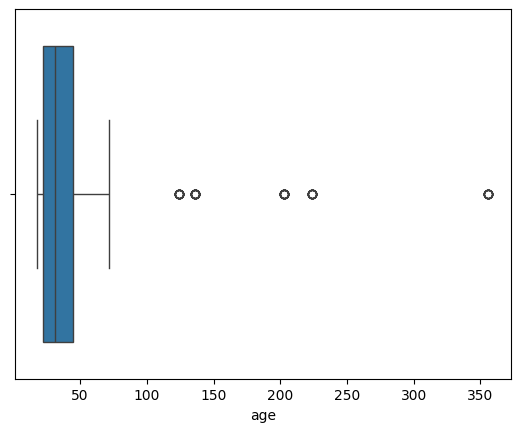

In [12]:
sns.boxplot(x=df['age'])

In [13]:
num_features = list(df.select_dtypes(include=[np.number]).columns)
num_features

['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount']

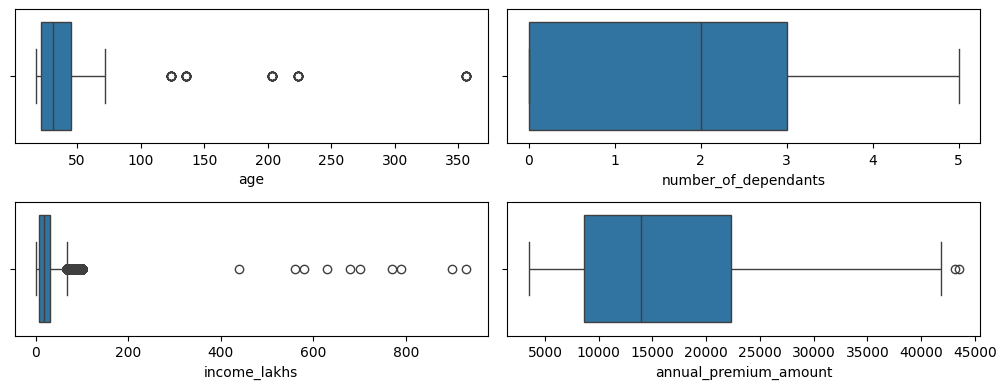

In [14]:
fig,axes = plt.subplots(2,2,figsize=(10,4))
axes = axes.flatten()

for i,feature in enumerate(num_features):
    sns.boxplot(x=df[feature],ax=axes[i])
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

### Treating the outliers in `age`

In [15]:
df[df['age'] > 100]['age'].unique()

array([224, 124, 136, 203, 356])

In [16]:
print("Number of outliers where age > 100:",df[df['age'] > 100].shape[0])

Number of outliers where age > 100: 58


In [17]:
df1 = df[df['age'] <= 100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


### Checking the distribution of income_lakhs

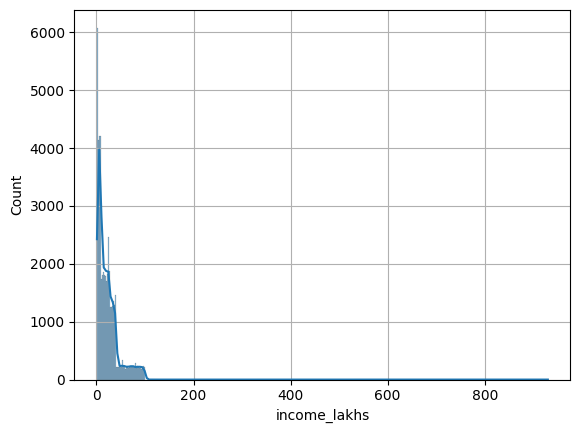

In [18]:
sns.histplot(df1['income_lakhs'],kde=True)
plt.grid()
plt.show()

- Distribution appears very skewed

We can use IQR get rid of the outliers in income

In [19]:
Q1,Q3 = df1['income_lakhs'].quantile([0.25,0.75])
print(Q1)
print(Q3)

7.0
31.0


In [20]:
def get_iqr_bounds(col):
    Q1,Q3 = df1[col].quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*Q1
    upper_bound = Q3 + 1.5*Q3
    return lower_bound,upper_bound


In [21]:
lb,ub = get_iqr_bounds('income_lakhs')
print("Lower bound:",lb)
print("Upper bound:",ub)

Lower bound: -3.5
Upper bound: 77.5


In [22]:
income_quantile_threshold = df1['income_lakhs'].quantile(0.999)
income_quantile_threshold

np.float64(100.0)

In [23]:
df2 = df1[df1['income_lakhs'] < income_quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49808.000000,49808.000000,49808.000000,49808.000000
mean,34.399333,1.717214,22.735083,15756.332276
std,13.683206,1.492056,21.921788,8417.581174
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8602.000000
50%,31.000000,2.000000,16.000000,13919.000000
75%,45.000000,3.000000,31.000000,22263.250000
max,72.000000,5.000000,99.000000,43471.000000


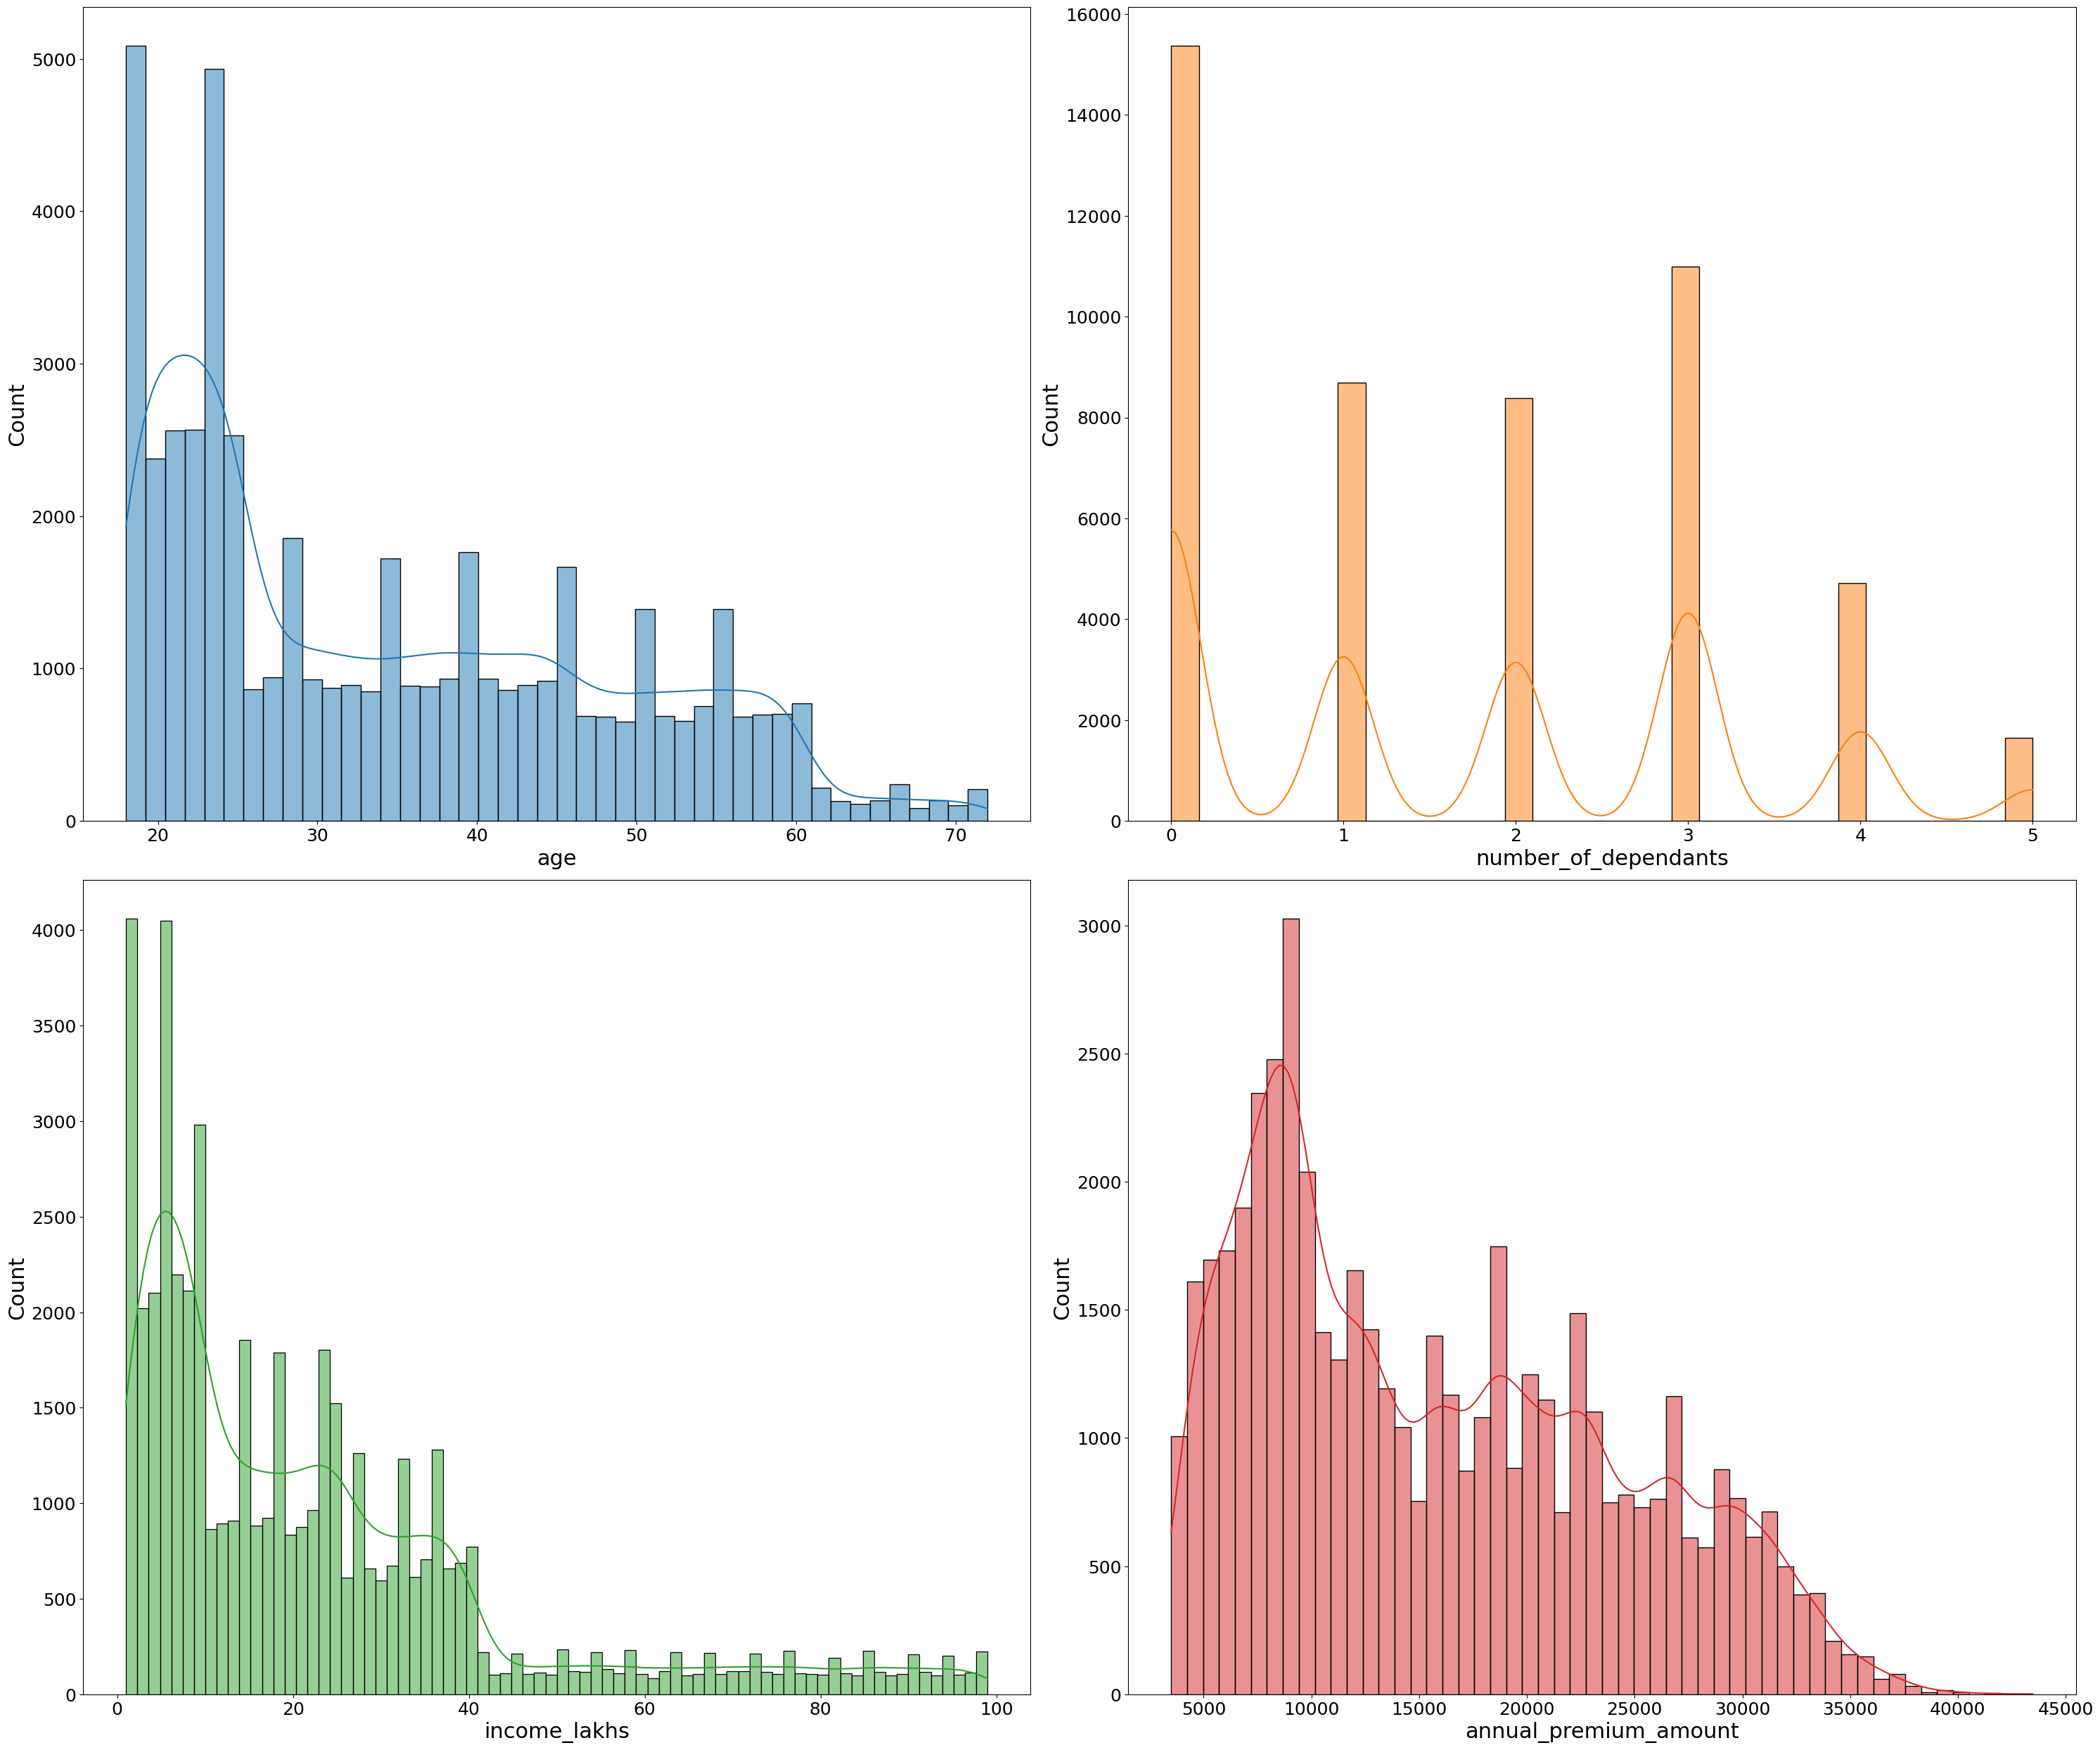

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(30, 25))
axes = axes.flatten()

colors = sns.color_palette('tab10',n_colors=len(num_features))

for i, feature in enumerate(num_features):
    sns.histplot(df2[feature], ax=axes[i],kde=True,color=colors[i])

    axes[i].set_xlabel(feature, fontsize=22)
    axes[i].set_ylabel("Count", fontsize=22)

    axes[i].tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()


### Exploring the relationship between numeric features

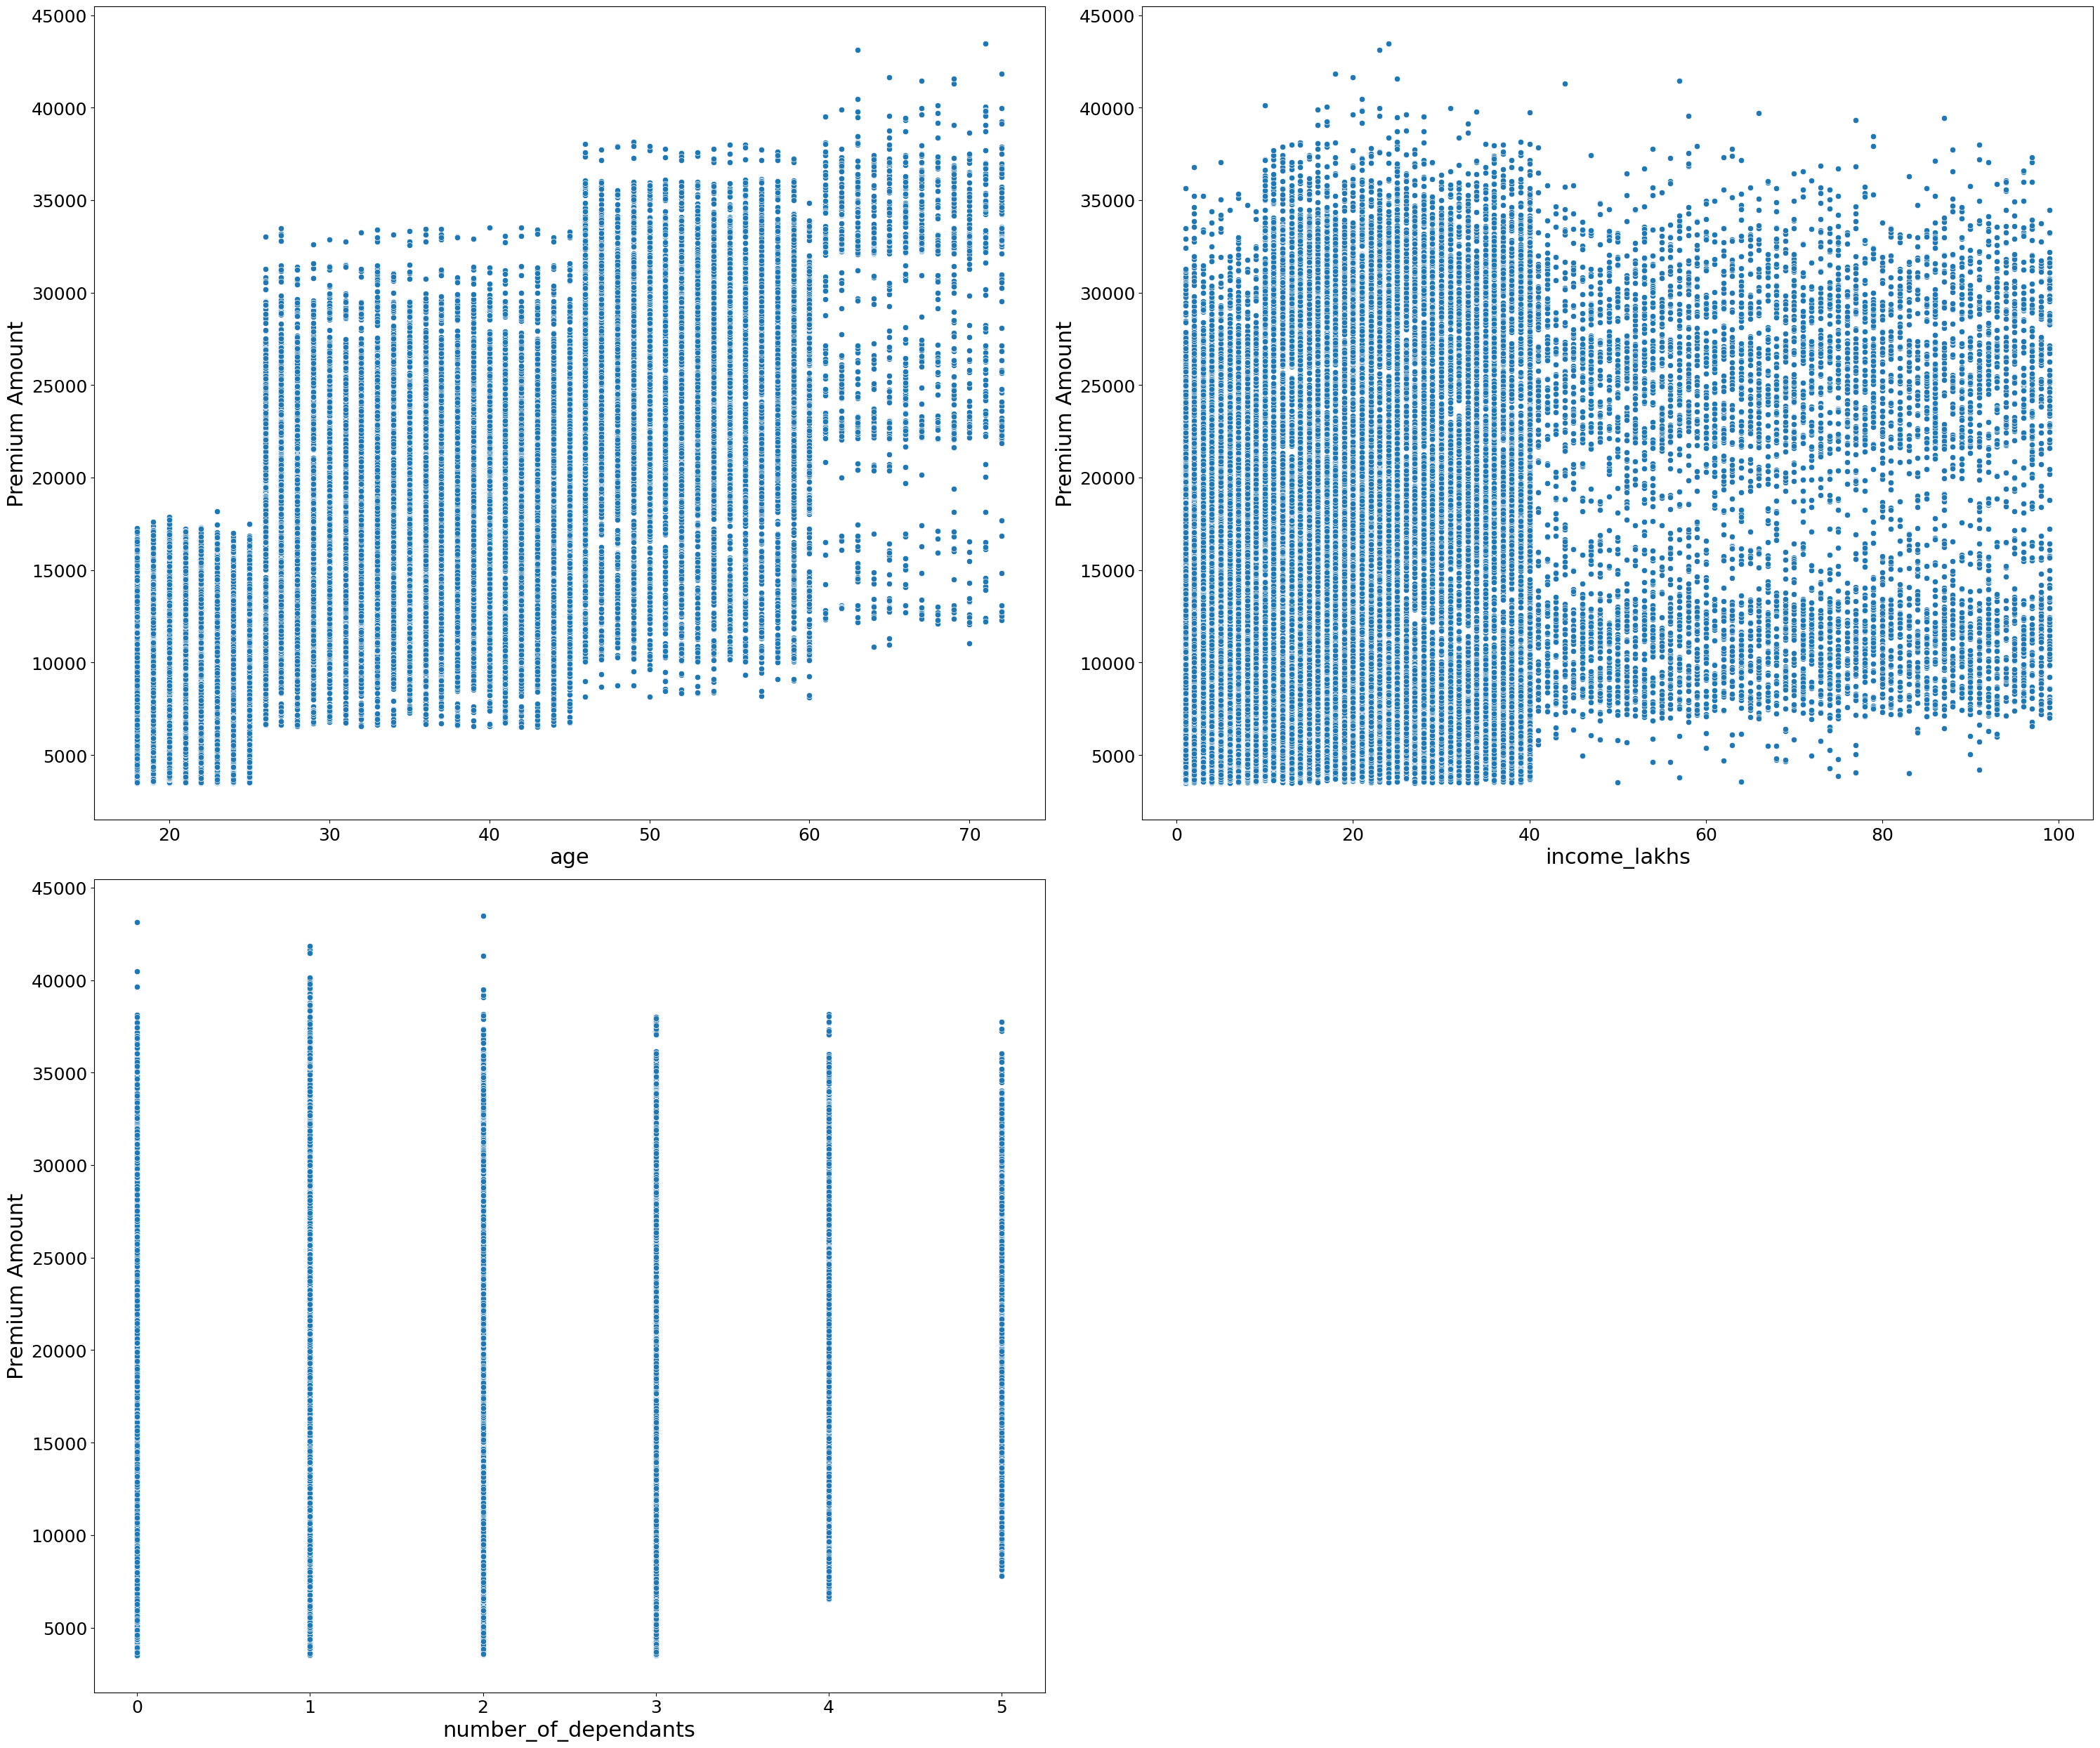

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(30, 25))
axes = axes.flatten()

num_features = ['age','income_lakhs','number_of_dependants']


for i, feature in enumerate(num_features):
    sns.scatterplot(df2,x=feature,y=df2['annual_premium_amount'],ax=axes[i])

    axes[i].set_xlabel(feature, fontsize=22)
    axes[i].set_ylabel("Premium Amount", fontsize=22)

    axes[i].tick_params(axis='both', labelsize=18)

for j in range(len(num_features),len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


- We can tell that as age increases the insurance premium increases 
- However the relationship trend is not clear with no of dependants and annual income. income_lakhs and premium amount 

### Categorical features

In [26]:
categorical_columns = df2.select_dtypes(include=object).columns.tolist()
for col in categorical_columns:
    print(col,":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


`smoke_status` has repeated values for no smoking we will replace it with a single value to indicate no smoking

In [27]:
df2 = df2.copy()
df2['smoking_status'] = df2['smoking_status'].replace({
    "Smoking=0":"No Smoking",
    "Does Not Smoke":"No Smoking",
    "Smoking=0":"No Smoking",
    "Not Smoking":"No Smoking"})

In [28]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [29]:
pct_count = df2['gender'].value_counts(normalize=True)*100
pct_count

gender
Male      54.95302
Female    45.04698
Name: proportion, dtype: float64

In [30]:
pct_count = pct_count.reset_index()
pct_count.columns = ['gender','percentage']
pct_count

,gender,percentage
0,Male,54.95302
1,Female,45.04698


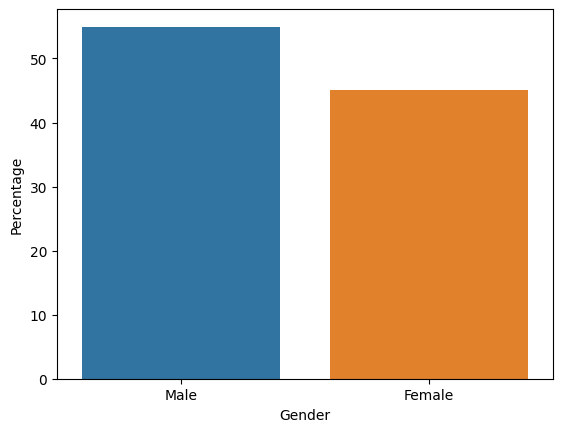

In [31]:
sns.barplot(
    data=pct_count,
    x='gender',
    y='percentage',
    hue='gender',
    palette='tab10'
)

plt.ylabel("Percentage")
plt.xlabel('Gender')
plt.show()

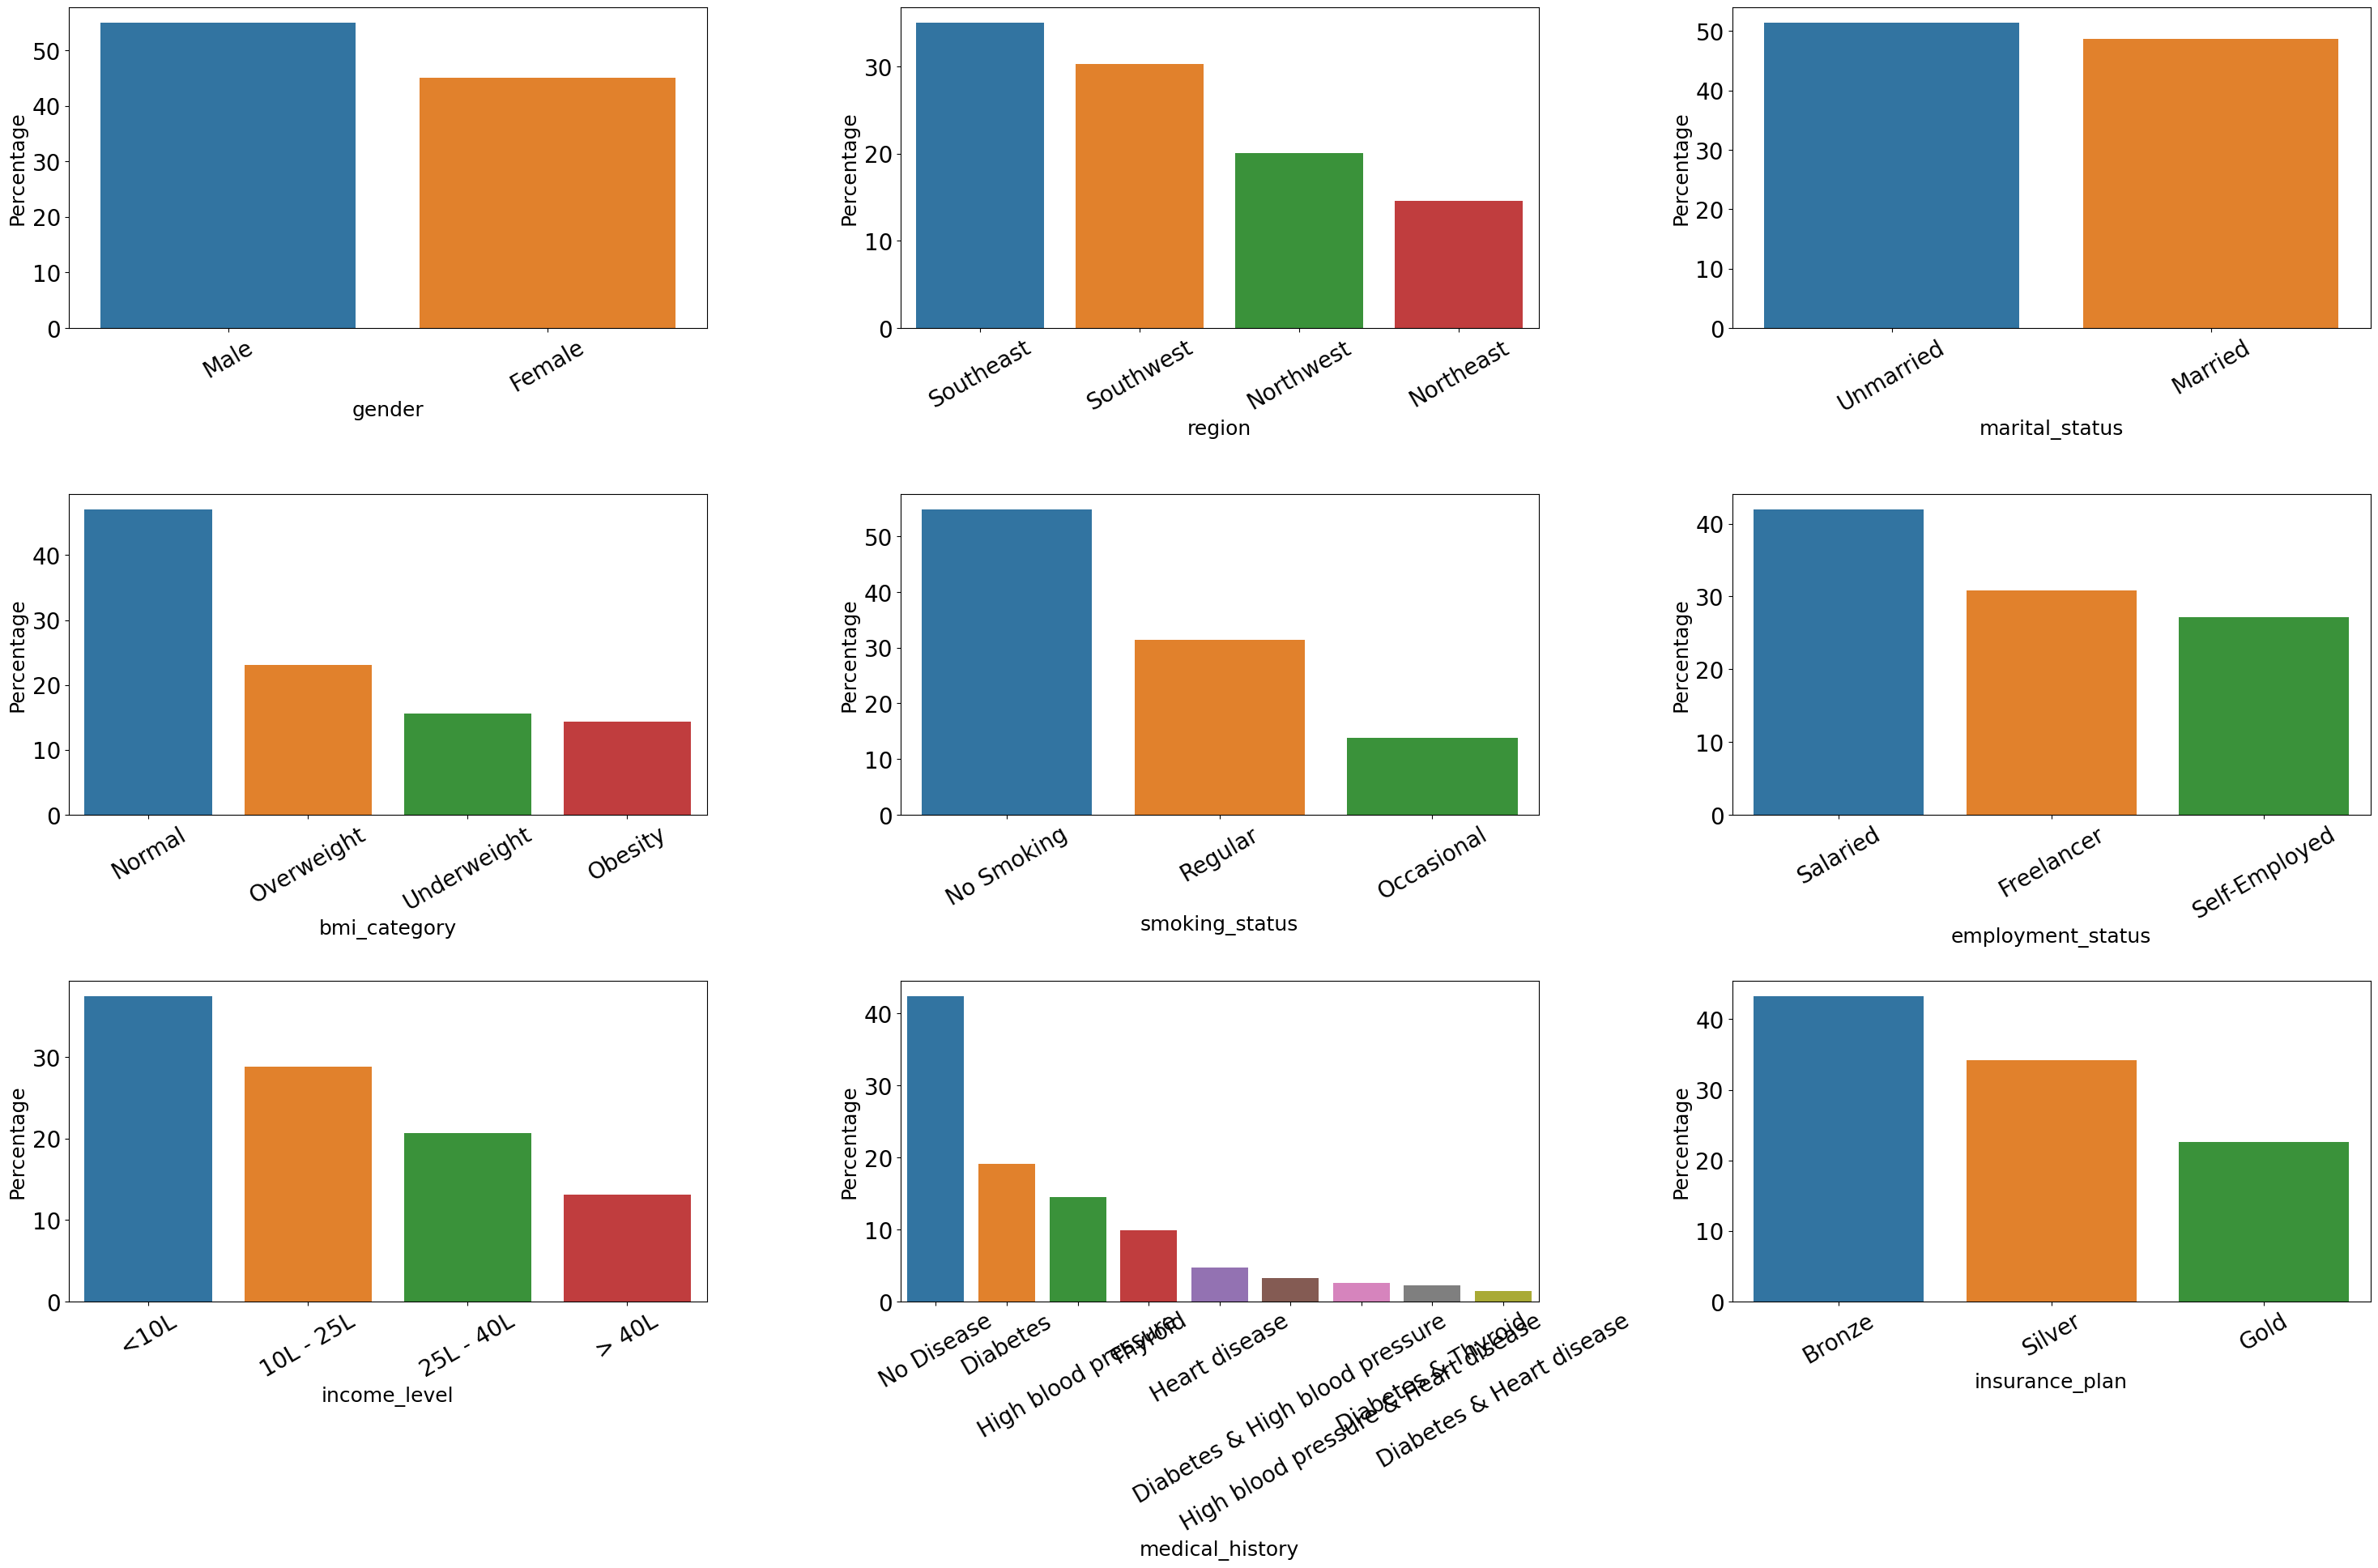

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
axes = axes.flatten()

for ax, column in zip(axes, categorical_columns):
    cat_counts_pct = (
        df2[column]
        .value_counts(normalize=True)
        .mul(100)
        .reset_index()
    )
    cat_counts_pct.columns = [column, 'percentage']

    sns.barplot(
        data=cat_counts_pct,
        x=column,
        y='percentage',
        hue=column,
        palette='tab10',
        ax=ax
    )

    ax.set_xlabel(column, fontsize=18)
    ax.set_ylabel("Percentage", fontsize=18)

    ax.tick_params(axis='x', labelsize=20, rotation=30)
    ax.tick_params(axis='y', labelsize=20)

# Turn off unused subplots
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout(pad=3)
plt.show()


- `Males` are more like to take the insurance premium 
- `Southeast` region has the highest number of consumers for premium and this is followed by the `Southwest` region. 
- Highest no of consumers for `bronze` premium plan 

In [33]:
income_level_ins_plan = pd.crosstab(df['income_level'],df['insurance_plan'])
income_level_ins_plan

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5314,3886,5189
25L - 40L,3686,2844,3753
<10L,12239,931,5495
> 40L,330,3662,2647


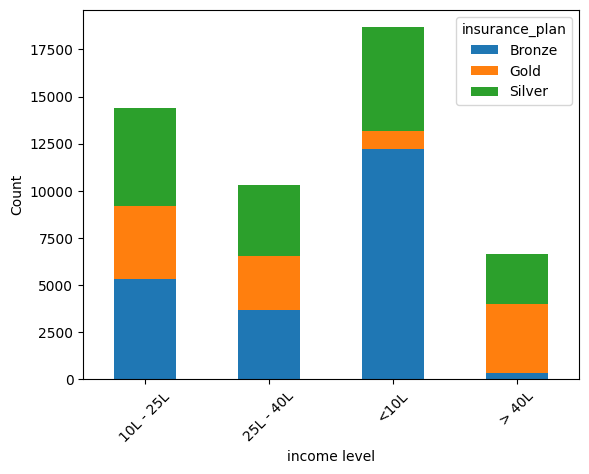

In [38]:
income_level_ins_plan.plot(kind='bar',stacked=True)
plt.xticks(rotation=45)
plt.xlabel("income level")
plt.ylabel("Count")
plt.show()

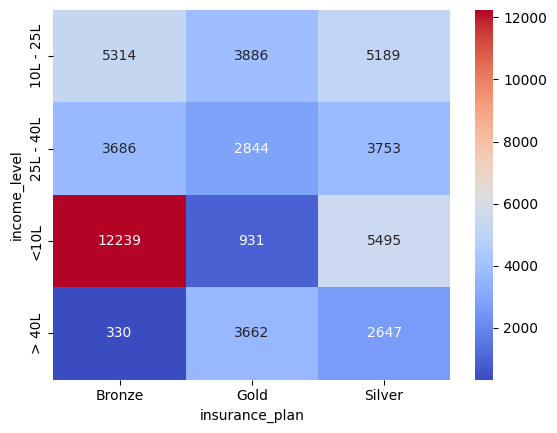

In [42]:
sns.heatmap(income_level_ins_plan,annot=True,cmap='coolwarm',fmt='d')
plt.show()